## Load workspace

In [1]:
#save.image(file = "DESeq2_notebook.RData")
load("DESeq2_trimmed_macrogen_data_alone_vangl2.RData")

## Load libraries

In [2]:
suppressPackageStartupMessages({library(Rsubread)
                                library(DESeq2)
                                library("dplyr")
                                library("ggplot2")
                                library("pheatmap")
                                library("RColorBrewer")
                                library(AnnotationDbi)
                                library(org.Dr.eg.db)
                                library(repr)
                                library(topGO)
                                library(GOstats)
                               })

library(GOstats)


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



In [3]:
# set size of plot windows
options(repr.plot.width=12, repr.plot.height=10)

Did not remove duplicated reads although there are UMIs general advice from Anika is that these haven't been useful in bulk as they saturate quickly. #may check eventually if this is the case here when we have low read recover.
Reads were mapped to danrer11 with STAR.
Here following the RNA-seq workflow from bioconductor: https://www.bioconductor.org/packages/devel/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html

## Rsubread
First create count matrix with Rsubread: https://bioconductor.org/packages/3.12/bioc/vignettes/Rsubread/inst/doc/Rsubread.pdf

ThefeatureCountsfunction  is  a  general-purpose  read  summarization  function  thatassigns mapped reads (RNA-seq or gDNA-seq reads) to genomic features such as genes,exons, promoters, gene bodies and genomic windows.This function takes as input a set of files that contain read mapping results and anannotation file that includes genomic features.  It automatically detects the format ofinput read files (supported formats include SAM and BAM). Input reads can be name-sorted or location-sorted.  Users do not need to resort the reads before feeding them to featureCounts.

In [4]:
#?list.files
bamfiles<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed", pattern= "*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles2<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "Blebb[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles3<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "DMSO[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles4<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "cmV[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles5<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "cmC[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles4
bamfiles5

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf1/cmV30hpf1.Aligned.out.bam"
[2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf2/cmV30hpf2.Aligned.out.bam"
[3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf3/cmV30hpf3.Aligned.out.bam"

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam"
[2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam"
[3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam"

In [5]:
#bamfiles
#bamfiles2
bamfiles_all<-c(bamfiles4, bamfiles5)
bamfiles_all

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf1/cmV30hpf1.Aligned.out.bam"    
[2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf2/cmV30hpf2.Aligned.out.bam"    
[3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf3/cmV30hpf3.Aligned.out.bam"    
[4] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam"
[5] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam"
[6] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam"

In [6]:
mycounts <- featureCounts(bamfiles_all, annot.ext="/fast/AG_Ohler/Alison/reference_genomes/danrer11/Danio_rerio.GRCz11.100.gtf", isGTFAnnotationFile=TRUE, isPairedEnd=FALSE, countMultiMappingReads = FALSE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.3.9

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           cmV30hpf1.Aligned.out.bam                        ||
||                           cmV30hpf2.Aligned.out.bam                        ||
||                           cmV30hpf3.Aligned.out.ba

In [7]:
#summary(mycounts)
#dim(mycounts$counts)
#head(mycounts$annotation)
#mycounts$targets
#mycounts$stat

## Import count matrix into DESeq2
Now import count matrix into DESeq2 with DESeqDataSetFromMatrix (see 3.2 Starting from count matrices)
Batches were given by Anne Merks. Could be divided based on embryonic clutches but this is unbalanced for the second expt because different embryonic lines were used, and also when the experiment was performed.
Experiment batches won't be used for selection of DE genes so can't be included in design formula. Decide whether it is better to analyse them separately or all together (first inclination is together, to allow more borrowed information).

In [8]:
countData<-mycounts$counts
allsamples<-read.csv("/fast/AG_Ohler/Alison/panakova_CM_RNAseq/mapped_trimmed_samplesheet_batches_macrogen.txt", sep="\t", header=TRUE)
allsamples[(allsamples$expt=="expt1" & (allsamples$condition=="wt" | allsamples$condition=="vangl2")),]
colData<-allsamples[(allsamples$expt=="expt1" & (allsamples$condition=="wt" | allsamples$condition=="vangl2")),]
#colData<-allsamples[allsamples$expt=="expt1",]
#colData

,path,samplename,condition,expt
,<chr>,<chr>,<chr>,<chr>
29,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf1,wt,expt1
30,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf2,wt,expt1
31,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam,cmCTL30hpf3,wt,expt1
32,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf1/cmV30hpf1.Aligned.out.bam,cmV30hpf1,vangl2,expt1
33,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf2/cmV30hpf2.Aligned.out.bam,cmV30hpf2,vangl2,expt1
34,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf3/cmV30hpf3.Aligned.out.bam,cmV30hpf3,vangl2,expt1


In [9]:
# add in a batch column
allsamples_vangl2_batch<-allsamples[( allsamples$expt=="expt1" & (allsamples$condition=="vangl2" | allsamples$condition=="wt")),]
# match order of bam files being read in
allsamples_vangl2_batch<-rbind(allsamples[( allsamples$expt=="expt1" & (allsamples$condition=="vangl2")),],allsamples[( allsamples$expt=="expt1" & (allsamples$condition=="wt")),] )
allsamples_vangl2_batch$batch<-c("batch1","batch2","batch3","batch1","batch2","batch3")
allsamples_vangl2_batch
colData<-allsamples_vangl2_batch

,path,samplename,condition,expt,batch
,<chr>,<chr>,<chr>,<chr>,<chr>
32,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf1/cmV30hpf1.Aligned.out.bam,cmV30hpf1,vangl2,expt1,batch1
33,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf2/cmV30hpf2.Aligned.out.bam,cmV30hpf2,vangl2,expt1,batch2
34,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf3/cmV30hpf3.Aligned.out.bam,cmV30hpf3,vangl2,expt1,batch3
29,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf1,wt,expt1,batch1
30,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf2,wt,expt1,batch2
31,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam,cmCTL30hpf3,wt,expt1,batch3


In [10]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                                 colData = colData,
#                                 design = ~ condition + batch)
                              design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


## Exploratory analysis and visualization

### Prefiltering the dataset
Removing rows with no counts or only a single count across all samples.
NB may come back and adjust this

In [11]:
nrow(dds)

[1] 32520

In [12]:
dds
colData(dds)

class: DESeqDataSet 
dim: 32520 6 
metadata(1): version
assays(1): counts
rownames(32520): ENSDARG00000102141 ENSDARG00000102123 ...
  ENSDARG00000101098 ENSDARG00000103574
rowData names(0):
colnames(6): cmV30hpf1.Aligned.out.bam cmV30hpf2.Aligned.out.bam ...
  cmCTL30hpf2.Aligned.out.bam cmCTL30hpf3.Aligned.out.bam
colData names(5): path samplename condition expt batch

DataFrame with 6 rows and 5 columns
                                              path  samplename condition
                                       <character> <character>  <factor>
cmV30hpf1.Aligned.out.bam   /fast/AG_Ohler/Aliso..   cmV30hpf1    vangl2
cmV30hpf2.Aligned.out.bam   /fast/AG_Ohler/Aliso..   cmV30hpf2    vangl2
cmV30hpf3.Aligned.out.bam   /fast/AG_Ohler/Aliso..   cmV30hpf3    vangl2
cmCTL30hpf1.Aligned.out.bam /fast/AG_Ohler/Aliso.. cmCTL30hpf1    wt    
cmCTL30hpf2.Aligned.out.bam /fast/AG_Ohler/Aliso.. cmCTL30hpf2    wt    
cmCTL30hpf3.Aligned.out.bam /fast/AG_Ohler/Aliso.. cmCTL30hpf3    wt    
                                   expt       batch
                            <character> <character>
cmV30hpf1.Aligned.out.bam         expt1      batch1
cmV30hpf2.Aligned.out.bam         expt1      batch2
cmV30hpf3.Aligned.out.bam         expt1      batch3
cmCTL30hpf1.Aligned.out.bam       expt1      batch1
cmCTL30hpf2.Aligned.out.bam       expt1      batch2
cmCTL30hpf3.Alig

In [13]:
keep <- rowSums(counts(dds)) > 1
# at least 3 samples with a count of 10 or higher
#keep <- rowSums(counts(dds) >= 1) >= 3
dds <- dds[keep,]
nrow(dds)

[1] 29146

### select samples with significant counts
Without any filtering of samples with low counts - samples 2, 5, 23, 3, 9, 14, 21, 22 cluster separately.

In [14]:
colSums(counts(dds))

cmV30hpf1.Aligned.out.bam   cmV30hpf2.Aligned.out.bam 
                   28790405                    32913766 
  cmV30hpf3.Aligned.out.bam cmCTL30hpf1.Aligned.out.bam 
                   33435654                    29142405 
cmCTL30hpf2.Aligned.out.bam cmCTL30hpf3.Aligned.out.bam 
                   30780310                    28325878

In [15]:
colSums(counts(dds[,colSums(counts(dds)) < 150000]))

numeric(0)

Hangover filtering steps from the lower depth samples. All this samples have very high depth.

In [16]:
keep2 <- colSums(counts(dds)) > 150000
dds <- dds[,keep2]
ncol(dds)

[1] 6

##  The variance stabilizing transformation and the rlog

Normalization here is aimed to stabilise the variance across the mean, for the purposes of plotting. If you just take counts, the largest counts have the highest absolute variance. If you take log2+1 of counts, the smaller counts will be over-represented in the variance.
DESeq2 has two methods to deal with this now - VST and rlog.
The rlog tends to work well on small datasets (n < 30), potentially outperforming the VST when there is a wide range of sequencing depth across samples (an order of magnitude difference).
=> Use rlog here, but it takes longer to compute

In [17]:
vsd <- vst(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(vsd), 3)

,cmV30hpf1.Aligned.out.bam,cmV30hpf2.Aligned.out.bam,cmV30hpf3.Aligned.out.bam,cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf3.Aligned.out.bam
ENSDARG00000102141,8.267349,8.469153,8.188491,8.471017,8.518731,8.578733
ENSDARG00000102123,7.550806,7.226068,7.505322,7.706103,7.277406,7.417531
ENSDARG00000114503,7.741235,7.969723,7.448210,8.573577,7.831392,8.193545


In [18]:
rld <- rlog(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(rld), 3)

,cmV30hpf1.Aligned.out.bam,cmV30hpf2.Aligned.out.bam,cmV30hpf3.Aligned.out.bam,cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf3.Aligned.out.bam
ENSDARG00000102141,7.650322,7.821745,7.582888,7.823327,7.863582,7.914223
ENSDARG00000102123,6.115254,5.848930,6.077415,6.244508,5.890193,6.004432
ENSDARG00000114503,6.849285,7.048954,6.593277,7.568572,6.928050,7.243357


Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


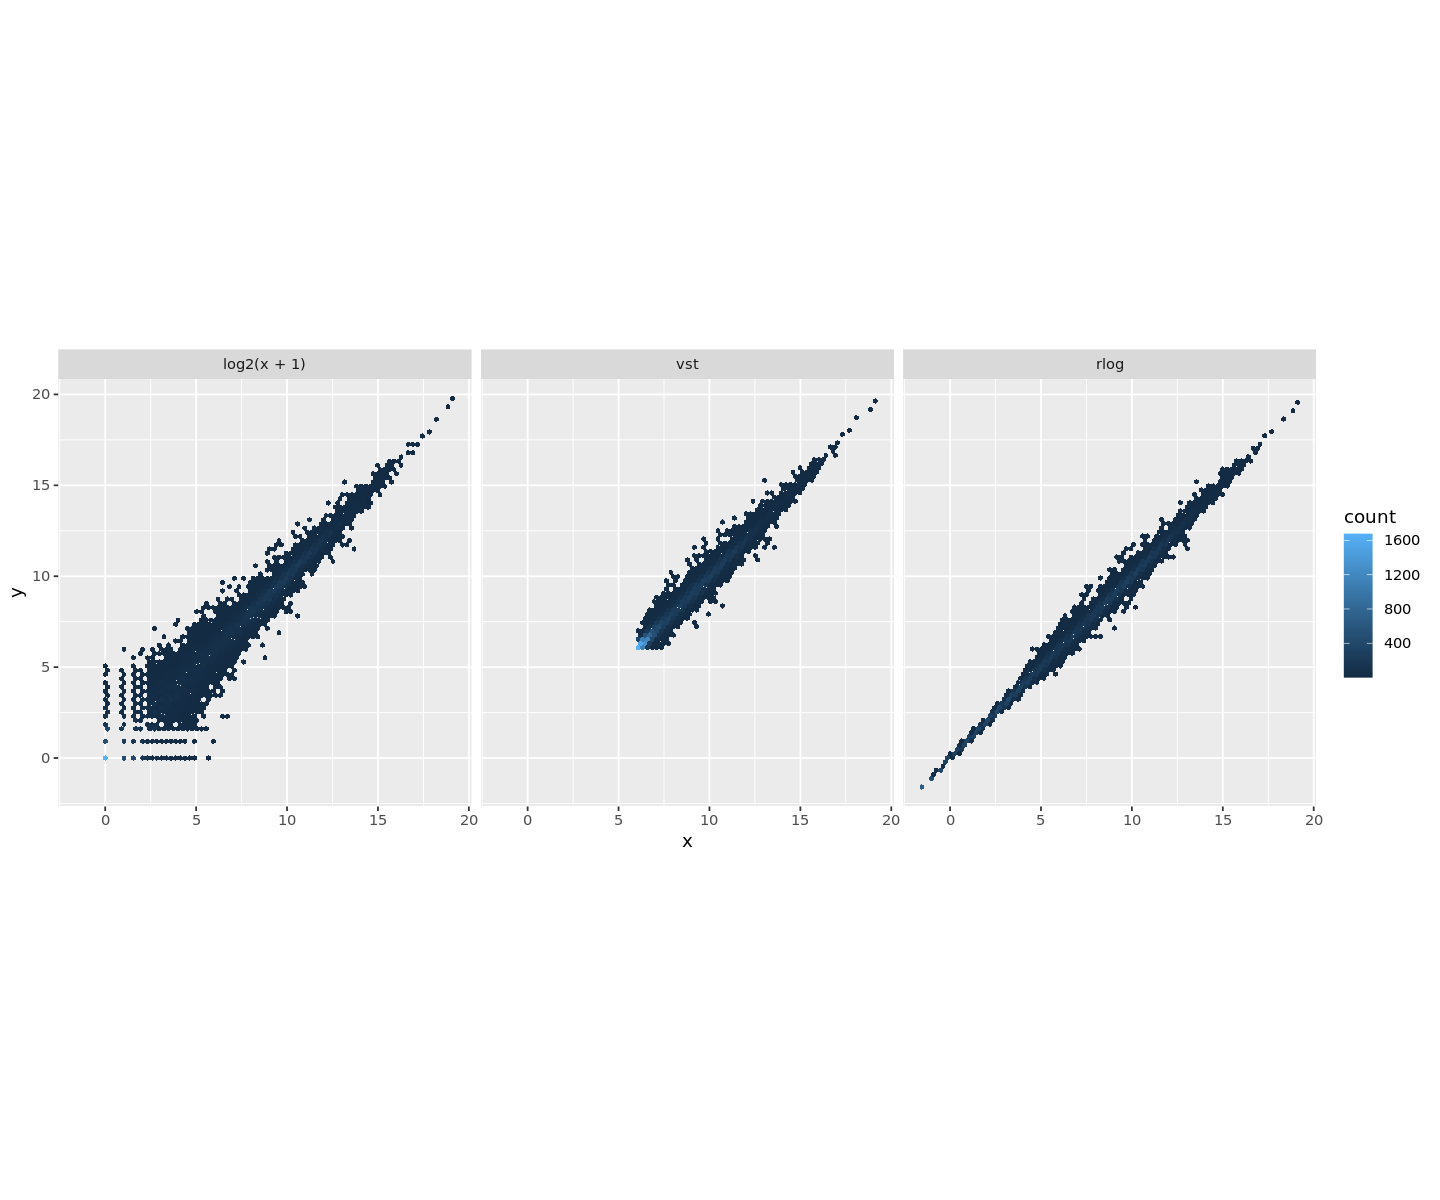

In [19]:
library("dplyr")
library("ggplot2")

dds <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("x", "y")  

lvls <- c("log2(x + 1)", "vst", "rlog")
df$transformation <- factor(df$transformation, levels=lvls)

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)  

In [20]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists

In [21]:
library("pheatmap")
library("RColorBrewer")

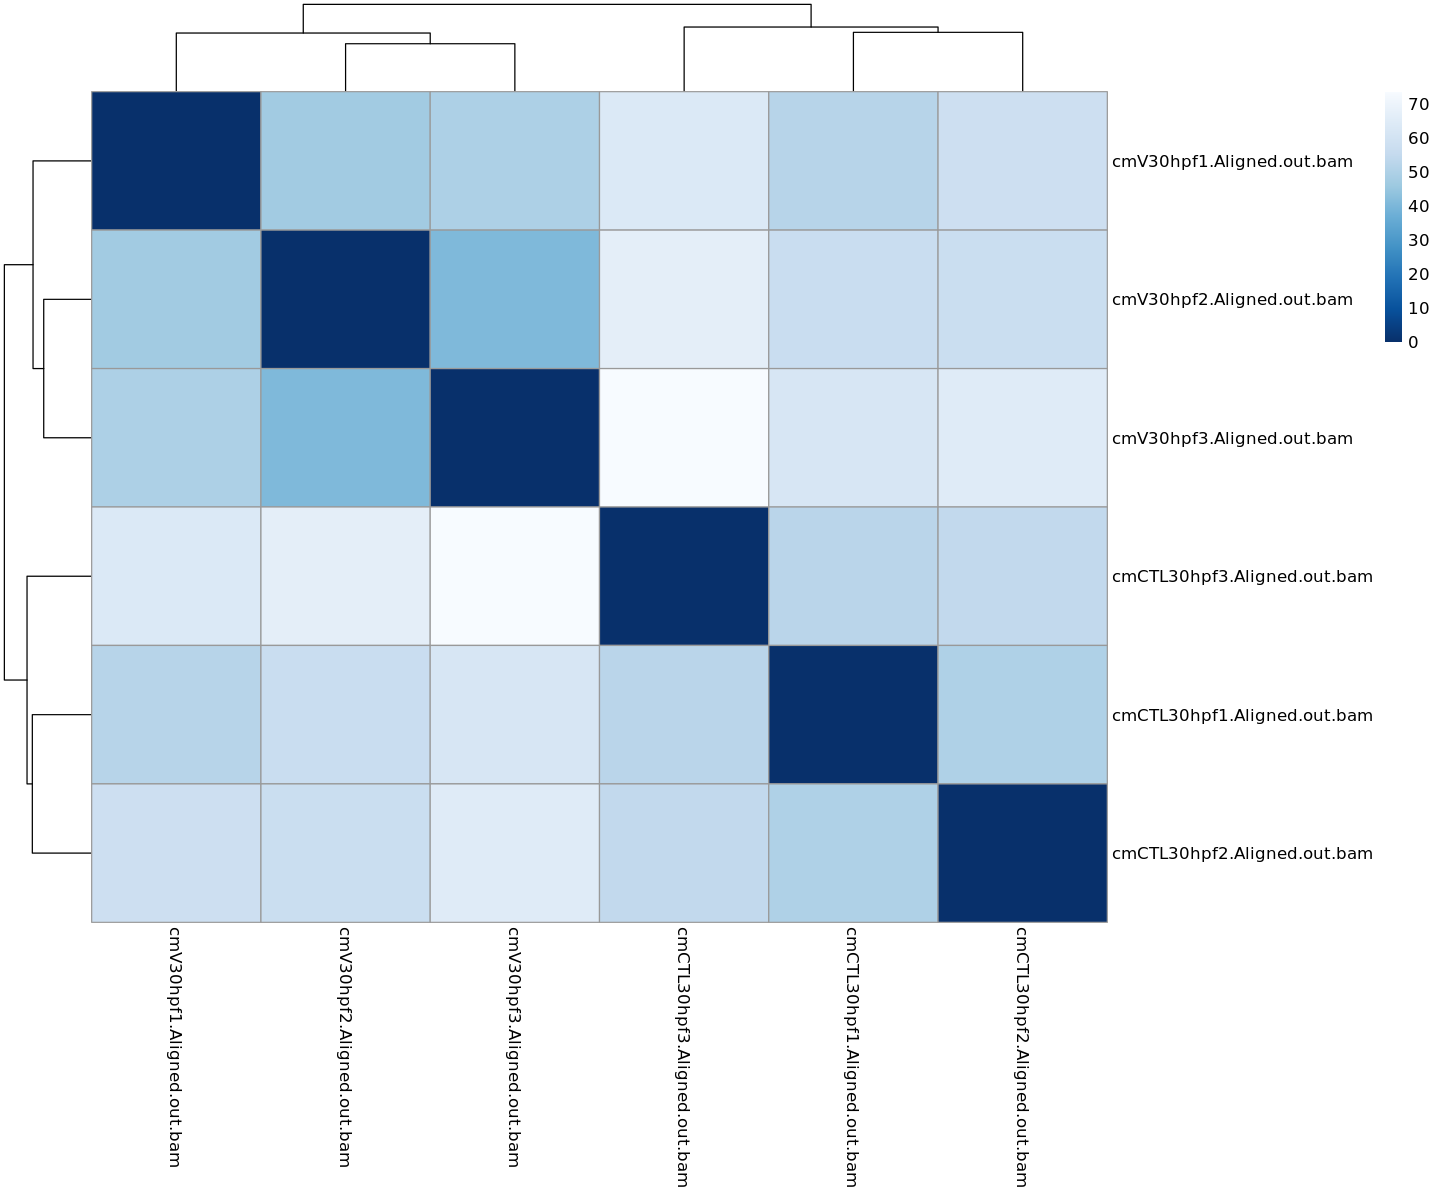

In [22]:
sampleDistMatrix <- as.matrix( sampleDists )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

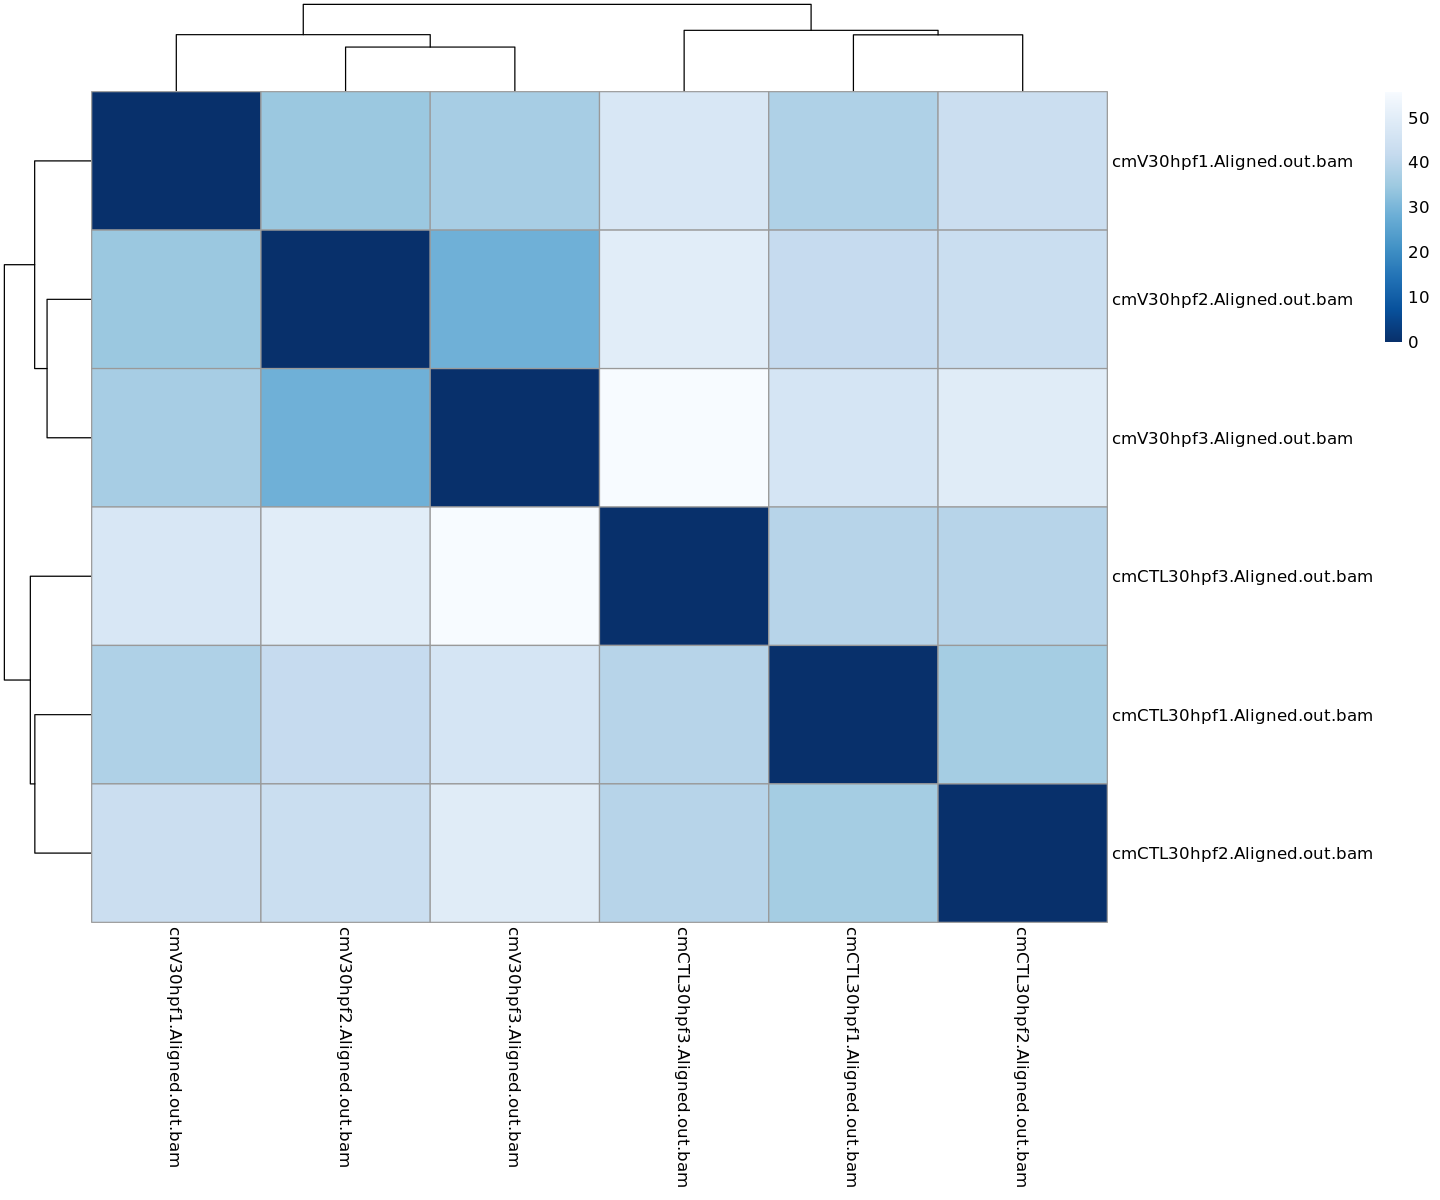

In [23]:
sampleDists_rld <- dist(t(assay(rld)))
sampleDistMatrix_rld <- as.matrix( sampleDists_rld )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix_rld,
         clustering_distance_rows = sampleDists_rld,
         clustering_distance_cols = sampleDists_rld,
         col = colors)

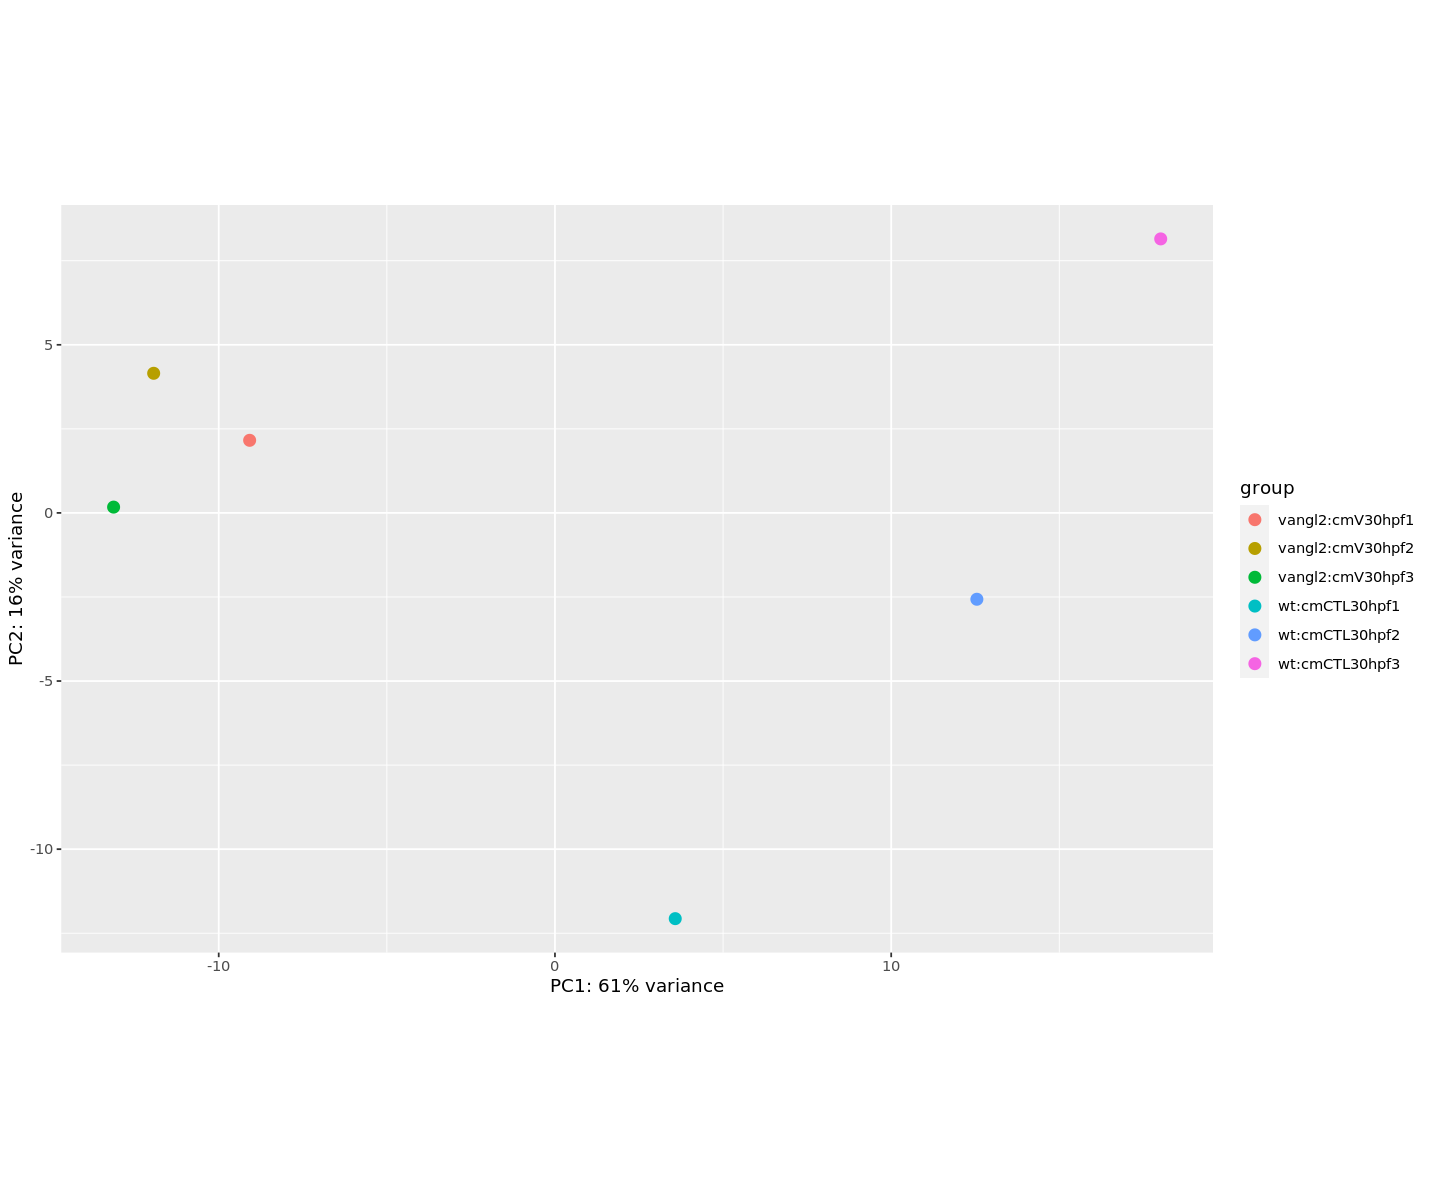

In [24]:
plotPCA(vsd, intgroup=c("condition","samplename"))
# add sample names

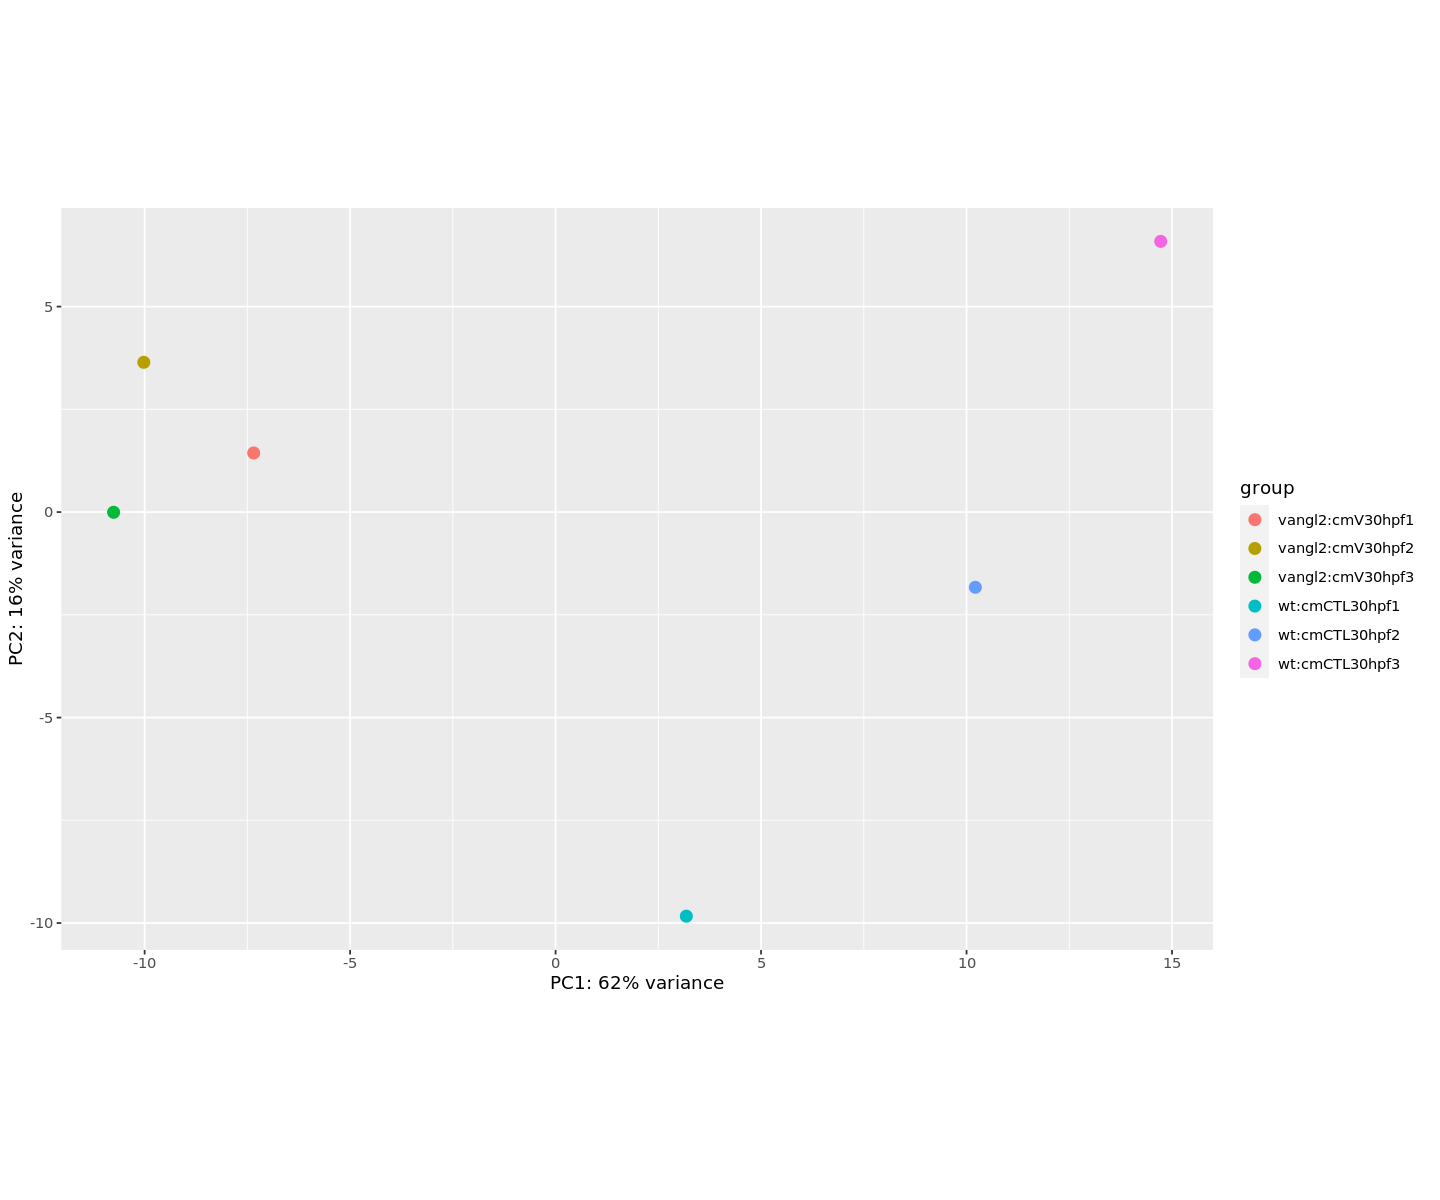

In [25]:
plotPCA(rld, intgroup=c("condition","samplename"))

## Differential expression analysis
As we have already specified an experimental design when we created the DESeqDataSet, we can run the differential expression pipeline on the raw counts with a single call to the function DESeq:

This function will print out a message for the various steps it performs. These are described in more detail in the manual page for DESeq, which can be accessed by typing ?DESeq. Briefly these are: the estimation of size factors (controlling for differences in the sequencing depth of the samples), the estimation of dispersion values for each gene, and fitting a generalized linear model.

A DESeqDataSet is returned that contains all the fitted parameters within it, and the following section describes how to extract out results tables of interest from this object.

In [26]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



### look up vangl2 raw counts

In [27]:
rawcounts<-assays(dds)$counts
#head(rawcounts)
##looking up vangl2
rawcounts[rownames(rawcounts) == "ENSDARG00000027397", ]

cmV30hpf1.Aligned.out.bam   cmV30hpf2.Aligned.out.bam 
                       2764                        2724 
  cmV30hpf3.Aligned.out.bam cmCTL30hpf1.Aligned.out.bam 
                       1871                        4123 
cmCTL30hpf2.Aligned.out.bam cmCTL30hpf3.Aligned.out.bam 
                       4193                        2994

### select significant genes between vangl2 and wt
If I don't filter out samples with low counts, only get 1 DE gene

In [28]:
res_vangl2 <- results(dds, contrast=c("condition","vangl2","wt"))

In [29]:
sum(res_vangl2$padj < 0.05, na.rm=TRUE)
resSig_vangl2 <- subset(res_vangl2, padj < 0.05)
resSig_vangl2 <- subset(resSig_vangl2, abs(log2FoldChange) > 1)
dim(resSig_vangl2)
sum(resSig_vangl2$log2FoldChange > 1, na.rm=TRUE)
sum(resSig_vangl2$log2FoldChange < -1, na.rm=TRUE)

[1] 1494

[1] 723   6

[1] 346

[1] 377

In [30]:
head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ])

log2 fold change (MLE): condition vangl2 vs wt 
Wald test p-value: condition vangl2 vs wt 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000094929   46.1207        8.02206  1.688693   4.75045 2.02962e-06
ENSDARG00000052437   21.7980        3.95841  0.790871   5.00513 5.58246e-07
ENSDARG00000020866  124.1907        3.82230  0.470501   8.12390 4.51456e-16
ENSDARG00000041645   21.7707        3.78451  0.822581   4.60077 4.20929e-06
ENSDARG00000040298  590.5359        3.71973  0.842562   4.41479 1.01110e-05
ENSDARG00000053973 1066.1902        3.64505  0.894568   4.07465 4.60843e-05
                          padj
                     <numeric>
ENSDARG00000094929 2.08178e-04
ENSDARG00000052437 7.54947e-05
ENSDARG00000020866 9.63405e-13
ENSDARG00000041645 3.85223e-04
ENSDARG00000040298 7.55903e-04
ENSDARG00000053973 2.42194e-03

#### Annotate sig genes between vang and wt

In [31]:
ens.str <- substr(rownames(res_vangl2), 1, length(rownames(res_vangl2)))
res_vangl2$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res_vangl2$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [32]:
resSig_vangl2 <- subset(res_vangl2, padj < 0.05)
resSig_vangl2 <- subset(resSig_vangl2, abs(log2FoldChange) > 1)
#head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 10)
#head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 10)

Check vangl2: it should be decreased in vangl2 mutant

In [33]:
dim(res_vangl2)
res_vangl2[row.names(res_vangl2)=="ENSDARG00000027397",]

[1] 29146     8

log2 fold change (MLE): condition vangl2 vs wt 
Wald test p-value: condition vangl2 vs wt 
DataFrame with 1 row and 8 columns
                    baseMean log2FoldChange     lfcSE      stat     pvalue
                   <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSDARG00000027397   3085.36      -0.603806  0.204912  -2.94665 0.00321232
                        padj      symbol      entrez
                   <numeric> <character> <character>
ENSDARG00000027397   0.04706      vangl2      245949

In [34]:
topBotDEGenes_vangl2<-rbind(head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 20),
                       head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 20))

In [35]:
vangl2wt_samples<-colData(vsd)[vsd$condition == "vangl2" | vsd$condition == "wt",]

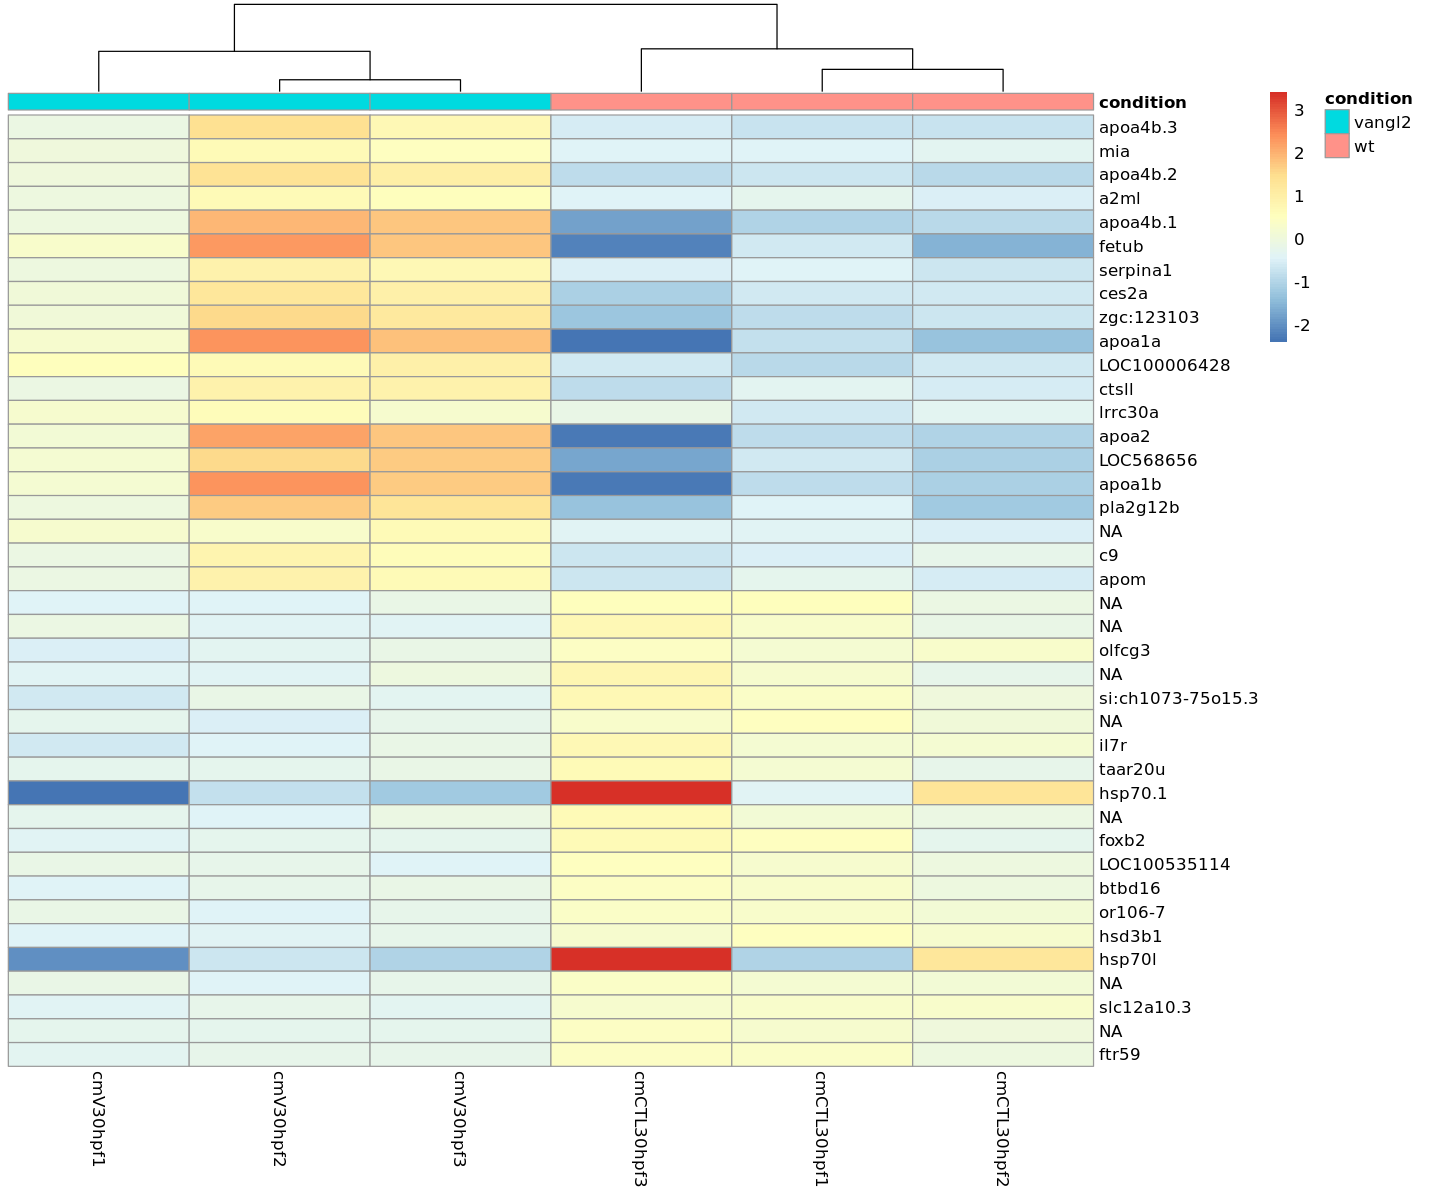

In [36]:
pretty_heatmap<-function(topBotDEGenes, samples, filename){
    mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(samples)])
    mat  <- mat - rowMeans(mat)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    labels_row = c(topBotDEGenes$symbol)
    #pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = filename)
    pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
}

pretty_heatmap(topBotDEGenes_vangl2,vangl2wt_samples, "deseq2_macrogenonlyvangl2_outputs/topbot20heatmap_vangl2_wt.pdf")



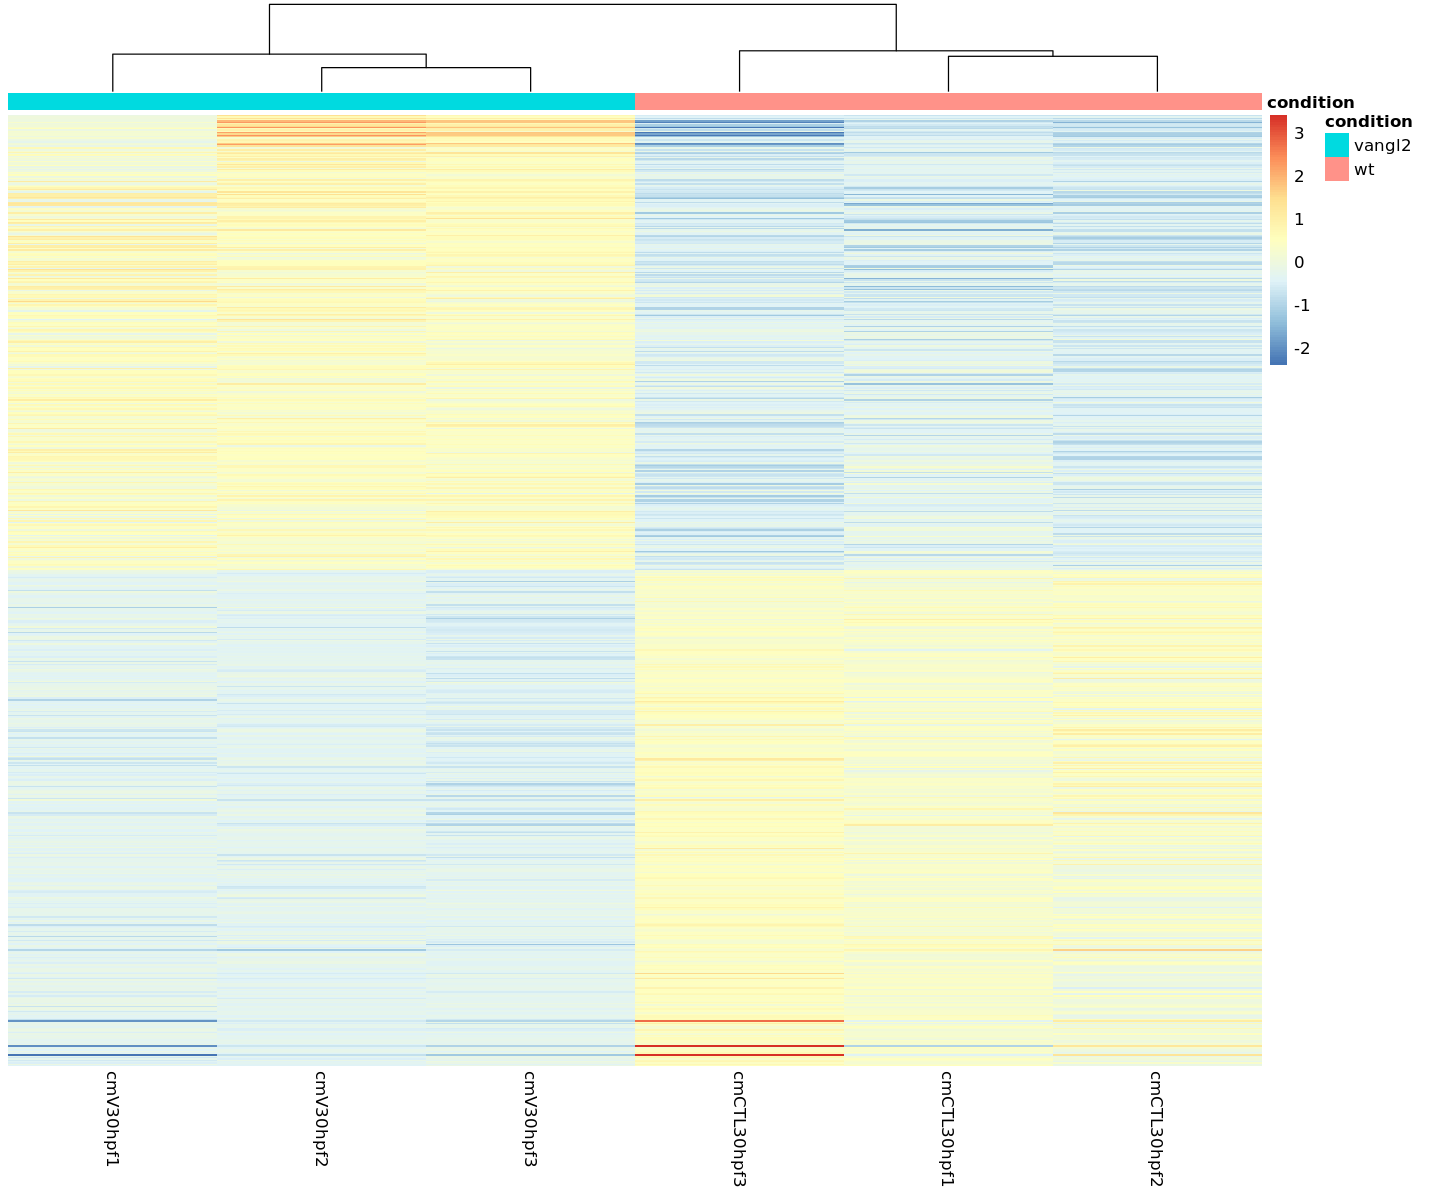

In [37]:
allDEGenes_vangl2<-resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ]

pretty_heatmap_all<-function(allDEGenes, samples, filename){
    matall<-(assay(vsd)[rownames(allDEGenes), rownames(samples)])
    matall  <- matall - rowMeans(matall)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE)
    #pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE, filename = filename)
}

pretty_heatmap_all(allDEGenes_vangl2, vangl2wt_samples, "deseq2_macrogenonlyvangl2_outputs/allDEpadj0.05_heatmap_vangl2_wt.pdf")

In [38]:
### write results table

In [41]:
resSigOrdered_vangl2 <- resSig_vangl2[order(-resSig_vangl2$log2FoldChange),]
resSigOrderedDF_vangl2 <- as.data.frame(resSigOrdered_vangl2)
head(resSigOrderedDF_vangl2)
write.csv(resSigOrderedDF_vangl2, file = "deseq2_macrogenonlyvangl2_outputs/resultsDElogfc1padj0.05_vangl2_wt.csv")
write.csv(resSigOrderedDF_vangl2, file = "macrogen_and_celseq_analysisv2_200824/deseq2_macrogen_vangl2/macrogen_resultsDElogfc1padj0.05_vangl2_wt.csv")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000094929,46.12069,8.022058,1.6886935,4.750453,2.029618e-06,2.081780e-04,apoa4b.3,100004607
ENSDARG00000052437,21.79798,3.958411,0.7908708,5.005129,5.582456e-07,7.549472e-05,mia,569807
ENSDARG00000020866,124.19067,3.822301,0.4705010,8.123895,4.514563e-16,9.634054e-13,apoa4b.2,570354
ENSDARG00000041645,21.77065,3.784508,0.8225812,4.600771,4.209291e-06,3.852227e-04,a2ml,100006972
ENSDARG00000040298,590.53591,3.719729,0.8425616,4.414786,1.011099e-05,7.559035e-04,apoa4b.1,322543
ENSDARG00000053973,1066.19021,3.645046,0.8945676,4.074646,4.608433e-05,2.421937e-03,fetub,569489


## Volcano plot

Warning message:
“Removed 21112 rows containing missing values (geom_text).”


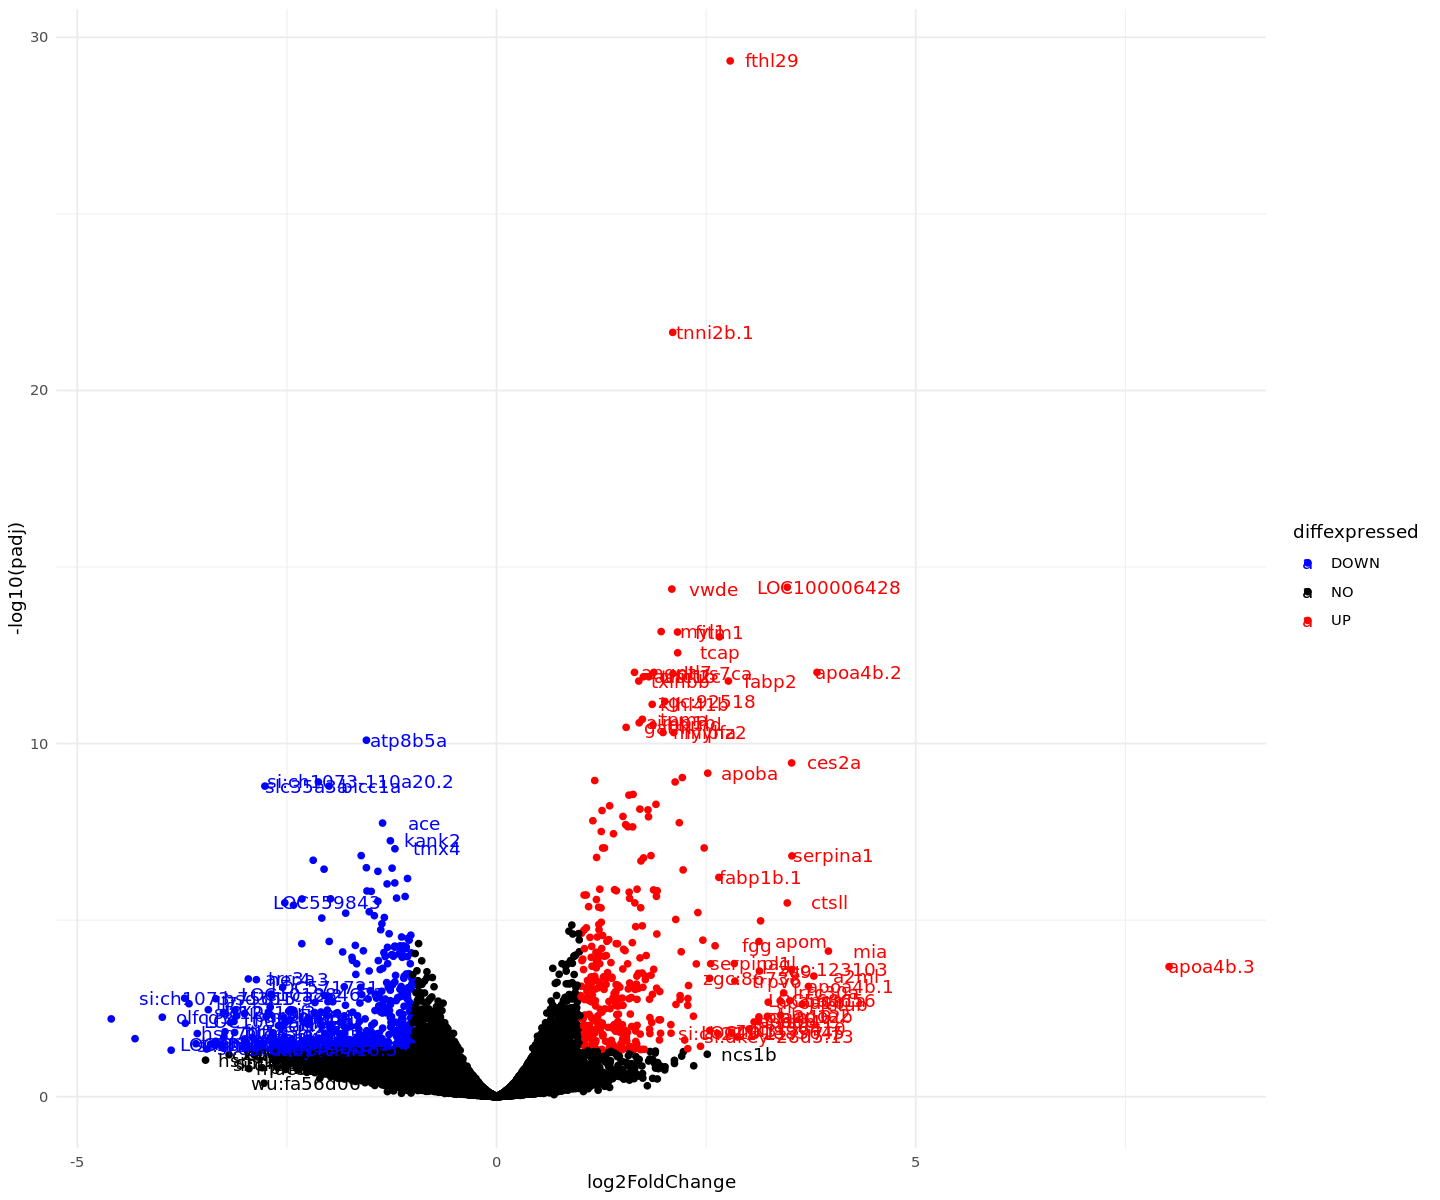

Saving 6.67 x 6.67 in image

Warning message:
“Removed 21112 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“Removed 21112 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image



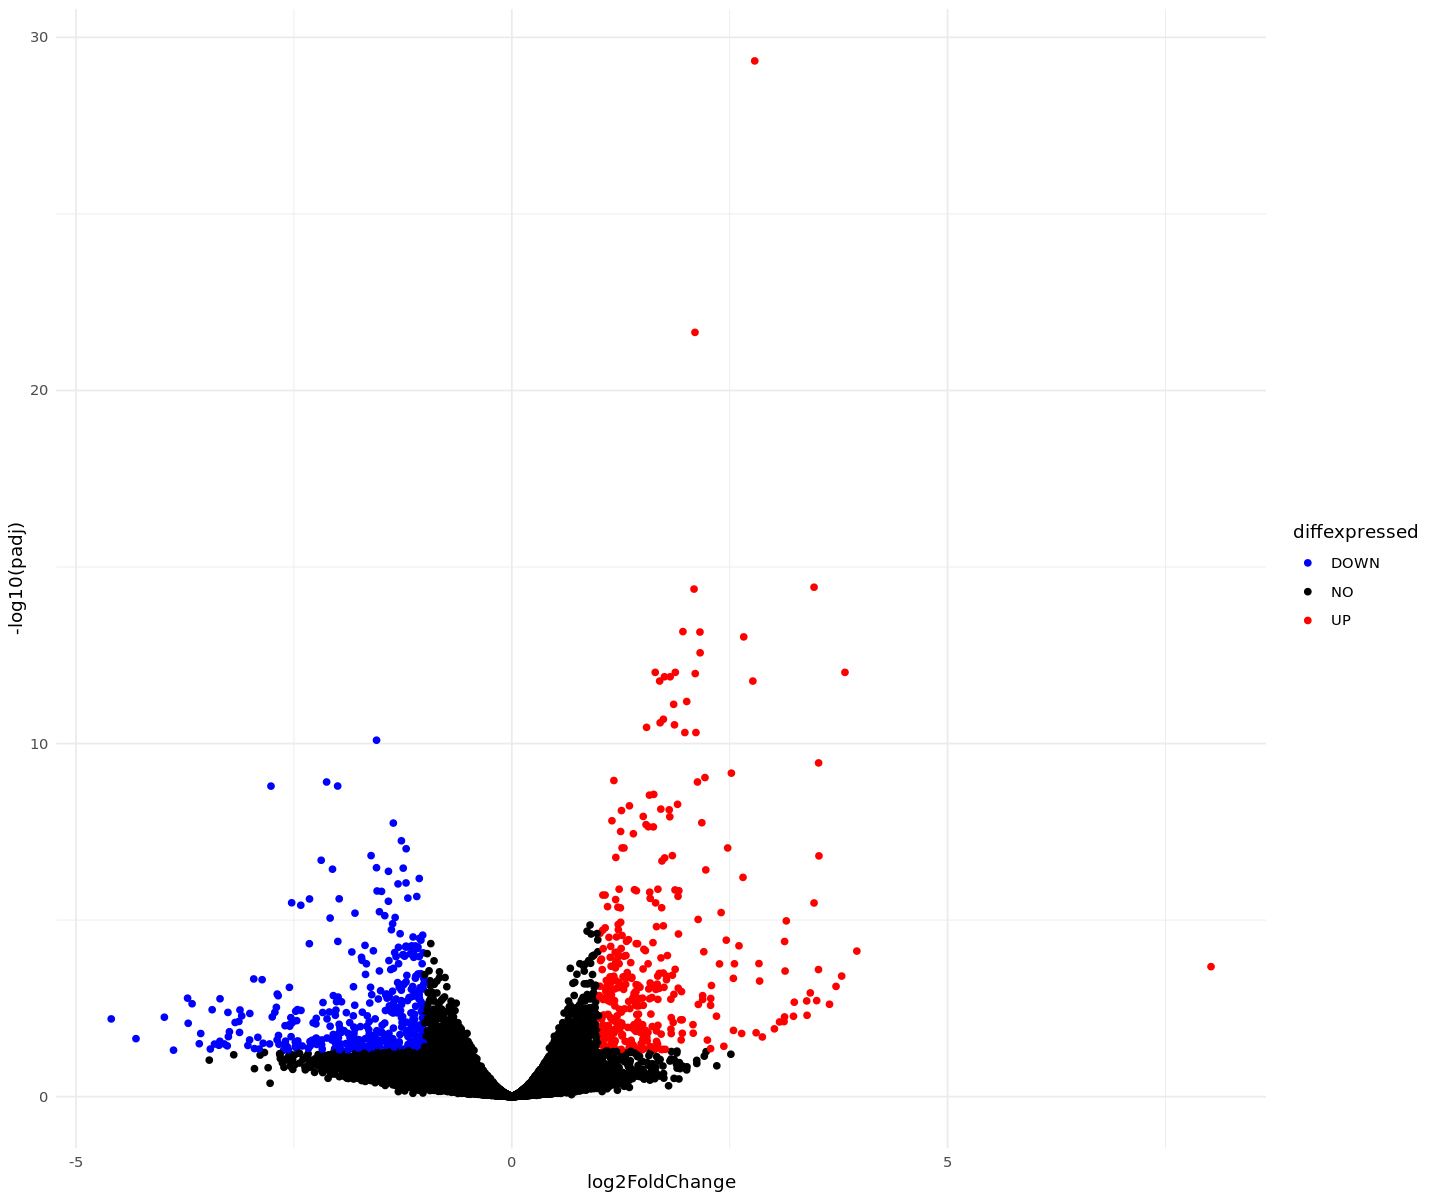

In [42]:
## volcano plot
de_vangl2<-data.frame(subset(res_vangl2, padj != 0))
de_vangl2$delabel <- NA
de_vangl2$symbol <- as.factor(de_vangl2$symbol)
# add a column of NAs
de_vangl2$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de_vangl2$diffexpressed[de_vangl2$log2FoldChange > 1 & de_vangl2$padj < 0.05] <- "UP"
# if log2Foldchange < -1 and pvalue < 0.05, set as "DOWN"
de_vangl2$diffexpressed[de_vangl2$log2FoldChange < -1 & de_vangl2$padj < 0.05] <- "DOWN"
#de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
#de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <-"UP"
de_vangl2$delabel[de_vangl2$log2FoldChange > 2.5 | -log10(de_vangl2$padj) > 10] <- as.character(de_vangl2$symbol[de_vangl2$log2FoldChange > 2.5 | -log10(de_vangl2$padj) > 10])
de_vangl2$delabel[(de_vangl2$log2FoldChange < -2.5) | (de_vangl2$log2FoldChange < -1 & -log10(de_vangl2$padj) > 7)] <- as.character(de_vangl2$symbol[(de_vangl2$log2FoldChange < -2.5) | (de_vangl2$log2FoldChange < -1 & -log10(de_vangl2$padj) > 7)])
plot<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed, label=delabel)) + 
    geom_point() + 
    theme_minimal() +
    geom_text(nudge_x = 0.5) +
scale_color_manual(values=c("blue", "black", "red"))
plot
plot2<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed)) + 
    geom_point() + 
    theme_minimal() +
scale_color_manual(values=c("blue", "black", "red"))
plot2
ggsave(filename = "deseq2_macrogenonlyvangl2_outputs/volcanoallDEFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "deseq2_macrogenonlyvangl2_outputs/nolab_volcanoallDEFC1padj0.05_vangl2_wt.pdf", plot=plot2)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_macrogen_vangl2/macrogen_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_macrogen_vangl2/macrogen_nolab_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot2)

### volcano plot overlaying second expt

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



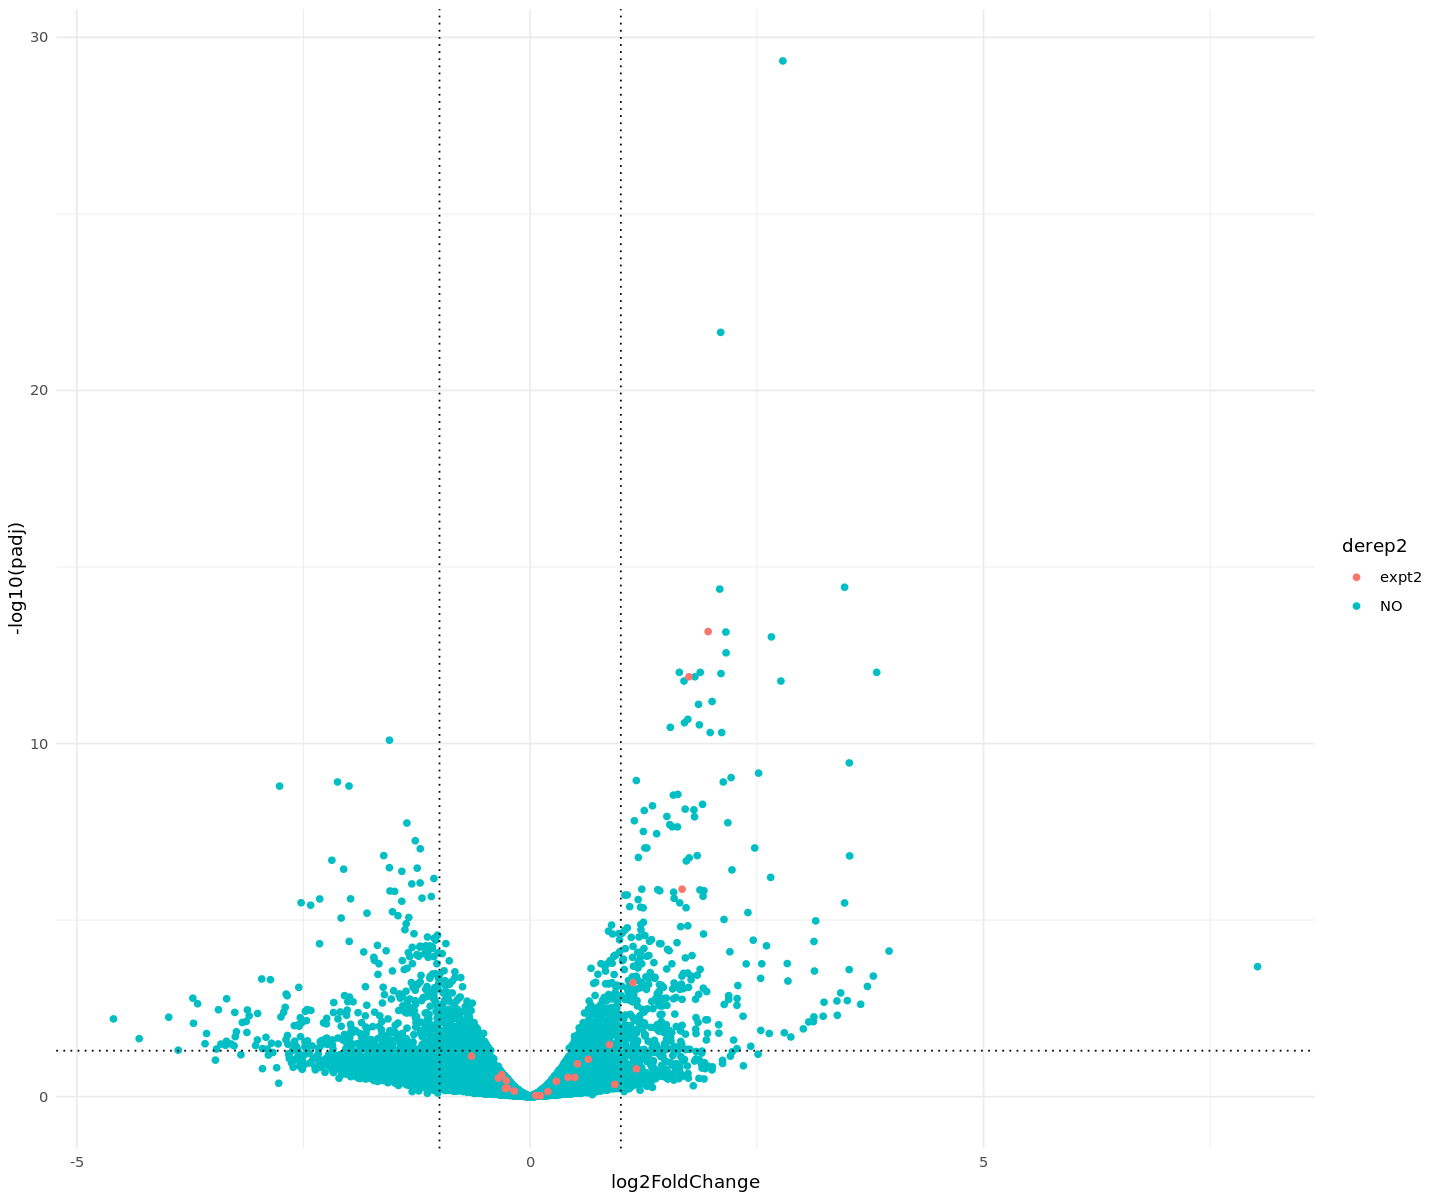

In [43]:
res_vangl_expt2<-read.csv("deseq2_trimmed_outputs_CELseq_vangl2/resultsDElogFC1padj0.05_vangl2_wt.csv", row.names=1)
de_vangl2$derep2 <- "NO"

de_vangl2$derep2[rownames(de_vangl2) %in% rownames(res_vangl_expt2)] <- "expt2"
de_vangl2 <- de_vangl2[order(-as.numeric(factor(de_vangl2$derep2))),]
plotoverlap<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=derep2)) + 
    geom_point() + 
    theme_minimal()+
    geom_vline(xintercept=c(-1, 1), col="black", linetype="dotted") +
    geom_hline(yintercept=-log10(0.05), col="black",linetype="dotted")
plotoverlap
ggsave(filename = "deseq2_macrogenonlyvangl2_outputs/volcanoallDEFC1padj0.05_vangl2_wt_expt2overlap.pdf", plot=plotoverlap)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_macrogen_vangl2/macrogen_volcanoallDElogFC1padj0.05_vangl2_wt_expt2overlap.pdf", plot=plotoverlap)


## Compare intersection between DE genes from bleb and from vangl2

In [77]:
DEvangl2<-na.omit(resSigOrderedDF_vangl2$entrez)
# get entrez ids exluding NAs
# do intersect
DEblebb<-na.omit(resSigOrderedDF$entrez)
length(DEvangl2)
length(DEblebb)


ERROR: Error in na.omit(resSigOrderedDF$entrez): object 'resSigOrderedDF' not found


In [63]:
length(intersect(DEvangl2,DEblebb))

[1] 368

Intersect is lower than the intersect that Anne obtained from macrogen, suggesting may be less biologically meaningful results. Try running DESeq2 on separated data and see how interect is there, and between the old dataset. It is possible that trying to normalise everything together doesn't help much.

## save workspace

In [44]:
save.image(file = "DESeq2_trimmed_macrogen_data_alone_vangl2.RData")